In [25]:
import seaborn as sns
from sklearn.datasets import load_digits

In [26]:
import matplotlib.pyplot as plt

In [28]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

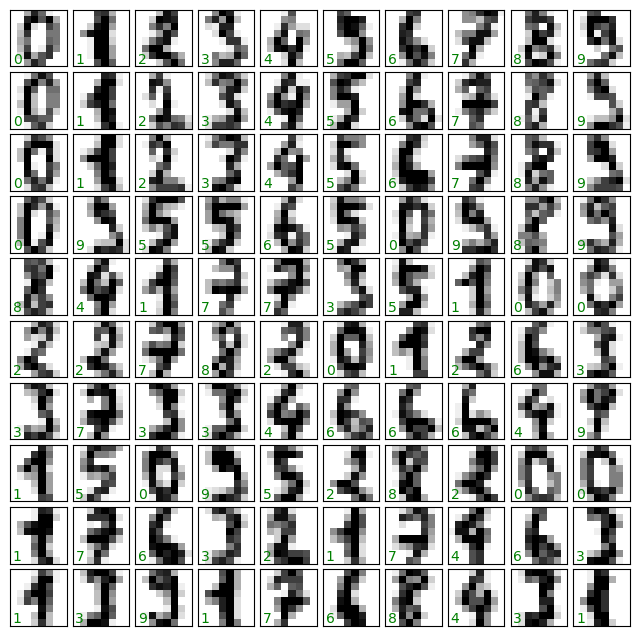

In [29]:
fig, axes = plt.subplots(10,10,figsize=(8,8),
                         subplot_kw={'xticks':[],'yticks':[]},
                         gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i ,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap ='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),
            transform = ax.transAxes,color ='green')

In [30]:
# 平面化
X = digits.data
X.shape

(1797, 64)

In [31]:
# 將y弄成應變量
y =digits.target
y.shape

(1797,)

In [32]:
from sklearn.manifold import Isomap

In [33]:
iso = Isomap(n_components= 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

c:\Users\s0954\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:352: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\s0954\AppData\Roaming\Python\Python310\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

C:\Users\s0954\AppData\Local\Temp\ipykernel_12536\429999883.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Accent',10))


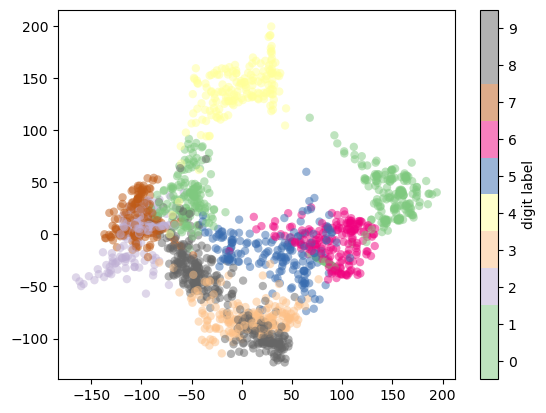

In [34]:
plt.scatter(data_projected[:,0],data_projected[:,1],c = digits.target,
            edgecolors='none',alpha=0.5,
            cmap=plt.cm.get_cmap('Accent',10))
plt.colorbar(label = 'digit label',ticks = range(10))
plt.clim(-0.5,9.5)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [36]:
# 建立模型
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=0)
model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.8333333333333334

In [38]:
#混淆矩陣
from sklearn.metrics import confusion_matrix

Text(113.9222222222222, 0.5, 'true value')

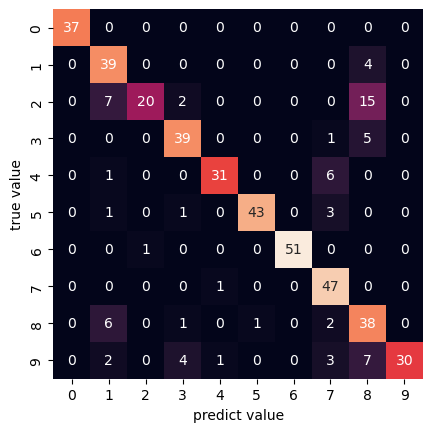

In [39]:
mat = confusion_matrix(ytest,y_model)

sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predict value')
plt.ylabel('true value')

#### 上圖中，可以發現"2"這個數字常被誤分為"1"和"8"

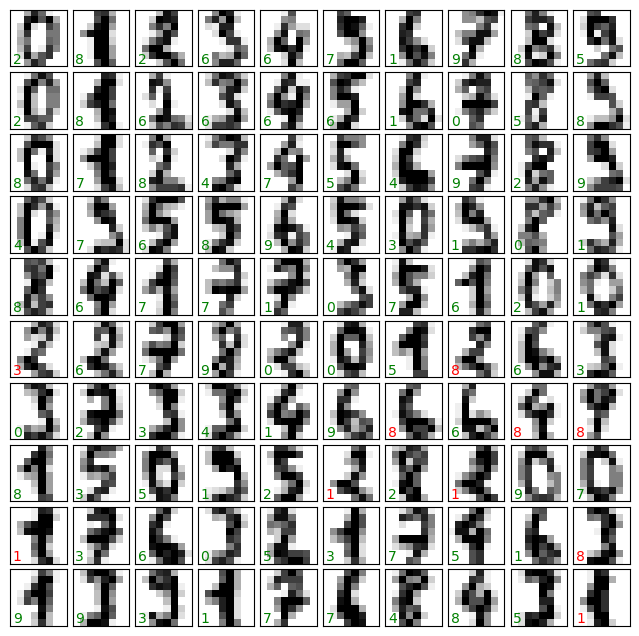

In [40]:
# 對圖稍作修改
'''
預判錯的下標數字變成紅色
'''
fig, axes = plt.subplots(10,10,figsize=(8,8),
                         subplot_kw={'xticks':[],'yticks':[]},
                         gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i ,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap ='binary',interpolation='nearest')
    if(ytest[i] == y_model[i]):
        color ='green'
    else:
        color = 'red'
    ax.text(0.05,0.05,str(y_model[i]),transform = ax.transAxes,color = color)